In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
tweets_trump = pd.read_csv('data/hashtag_donaldtrump.csv',lineterminator='\n', parse_dates=True)
tweets_biden = pd.read_csv('data/hashtag_joebiden.csv', lineterminator='\n', parse_dates=True)
tweets_both=pd.concat([tweets_trump,tweets_biden])
tweets_both

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,...,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617
776883,2020-11-08 23:59:41,1.325589e+18,L'OTAN va sortir de sa léthargie et redevenir ...,48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (matricule 6921) ✝️ 🇬🇷 🇮🇹 🇦🇲,CtrlAltDroite,Fils de mineur. Libertés - Identité - Solidari...,...,15806.0,France,46.603354,1.888334,NaN,France,Europe,NaN,NaN,2020-11-09 18:32:45.627335
776884,2020-11-08 23:59:52,1.325589e+18,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,1.0,1.0,Twitter for iPhone,5.293315e+08,Angelo Tani,AngeloTani,nato a casa dei nonni,...,5974.0,🌎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.599846


On s'intéresse au nombre de tweets journaliers.

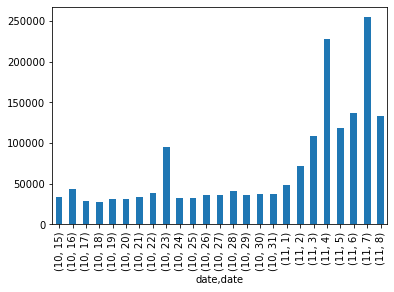

In [3]:
tweets_both['date']=[elem[0:10] for elem in tweets_both['created_at']]
tweets_both['date']=tweets_both["date"].astype("datetime64[ns]")
tweets_both['date'].groupby([tweets_both['date'].dt.month,tweets_both["date"].dt.day]).count().plot(kind="bar")
plt.show()

On remarque qu'il y'a beaucoup plus de tweets dans la période proche de l'élection, avec un pic le 4 novembre qui correspond à l'annonce des premiers résultats de l'élection et un pic le 7 novembre qui correspond à l'annonce officielle de la victoire de Biden. Il y a aussi un pic le 23 octobre qui correspond au débat entre Trump et Biden.

In [4]:
position=tweets_both[['long','lat']]
position=position.dropna()
geo_tweets_both=gpd.GeoDataFrame(tweets_both.loc[tweets_both['lat'].notna()],geometry=gpd.points_from_xy(position.long,position.lat))
#on sélectionne que les lignes où on a l'information des latitudes et longitudes
geo_tweets_both

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,date,geometry
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,2020-10-15,POINT (-80.19366 25.77427)
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,2020-10-15,POINT (-122.67419 45.52025)
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,2020-10-15,POINT (-77.03656 38.89499)
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866082651,2020-10-15,POINT (-117.22865 33.78252)
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two...",...,40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.612515712,2020-10-15,POINT (-82.68814 40.22536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776875,2020-11-08 23:59:15,1.325589e+18,@elnuevoherald @ngameztorres LOS MEDIOS A LA F...,0.0,0.0,Twitter Web App,1.263451e+18,RAÚL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 18:32:45.739408,2020-11-08,POINT (-79.36670 -1.33977)
776876,2020-11-08 23:59:16,1.325589e+18,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,3.772296e+08,Tim Welch,TimFWelch,transportation nerd; data geek.\nsenior lectur...,...,-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,2020-11-09 18:32:45.760347,2020-11-08,POINT (174.76318 -36.85209)
776879,2020-11-08 23:59:34,1.325589e+18,@elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...,0.0,0.0,Twitter Web App,1.263451e+18,RAÚL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 18:32:45.807233,2020-11-08,POINT (-79.36670 -1.33977)
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont gi...,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,...,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,2020-11-08,POINT (2.35146 48.85670)


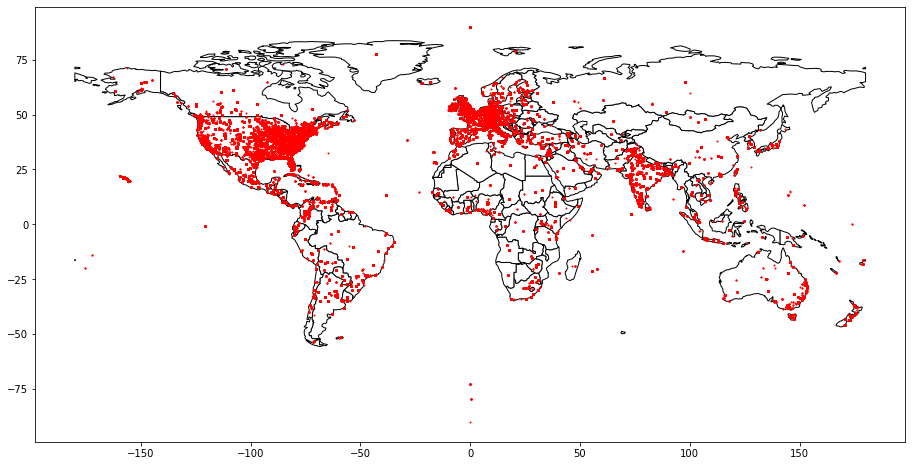

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name != "Antarctica"]
base = world.plot(color='white', edgecolor='black', figsize=(16,8))
geo_tweets_both.plot(ax=base, marker='o', color='red', markersize=1);
plt.show()